In [3]:
# Scientic libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import logging

# Helper libraries 
from tqdm.notebook import tqdm,trange
import warnings 
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina' # sets the figure format to 'retina' for high-resolution displays.

# Pandas options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # To display all interaction 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15) # When you print dataframes, 15 rows will be printed

# Table styles
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

# Seed value for numpy.random => makes notebooks stable across runs
np.random.seed(42)



### Data Ingestion

In [4]:
from credit_risk_model.data_processor import DataHandler

In [5]:
data_import = DataHandler(file_path='data/raw/LoanTap_data.csv')

data/raw/LoanTap_data.csv


In [6]:
# Loading data
df = data_import.load_data()

In [7]:
# Sanitizing the data
df = data_import.sanitize(df)

In [8]:
# Basic info of the dataset
pd.set_option('display.max_columns', None)
df.info()
df.describe(include=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\r\nFPO AP 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [11]:
df['issue_d']=pd.to_datetime(df['issue_d'], format='%b-%Y')

### EDA

In [12]:
# Instead of doing all the EDA manually will make use of Pandas reporting
from ydata_profiling import ProfileReport
# profile = ProfileReport(df,title='Pandas profiling of the dataset',explorative=True)
# profile.to_notebook_iframe()

#### Important points on the data after EDA using ydata profiling:
* Loan amount is little right skewed.
* Term has 2 categories 36 months and 60 months.
* The data has no duplicates.
* Interest rate is slightly skewed and has no missing values.
* Intsallment amount is also highly right skewed but we would not want to use it in analysis, as installment will be decided after the company has decided to give the loan, but here the objective is whether to give loan or not.
* The grade of the loans is categorical with B being the most common and G being the least common.
* There are a lot of categories in the employee_title column with missing values, won't be much useful for our analysis.
* The employee_length has 11 distinct categories with most common category being more than 10 years.
* Home ownership has 6 distinct categories, out of which the last 2 categories occur very less number of times.
* Annual income is highly skewed with skew value of around 41. Need to transform this column if applying logistic regression.
* Issue d is the issue date which will be after the loan has been approved, but here our objective is to check if the loan should be approved or not, so we can remove the column to avoid data leakage.
* There are almost 48k distinct values in title column so that will not be useful for us.
* Open_acc and Pub_rec are also highly right skewed.
* Revol_bal is also right skewed.
* Revol util is very slightly left skewed and close to normal so will not transform this.
* Total account is slightly right skewed.
* Mortgage accounts also is right skewed should be transformed.
* pub_rec_bankruptcies is also right skewed and should be transformed.
* The last 6 digits of address column is the zipcode which can be a useful feature.

### Validations and checks 
Sanity testcases execution to ensure there are no errors in importing the dataset.

### Test data separation 
Separating the test data in the first step only to avoid data leakage.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [14]:
# We have an imbalanced dataset, so let's stratify test and training sets with y variable 
# to ensure similar distribution of target in training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [15]:
# Validating if we have created a proper train and test split which is representative of the entire dataset
# Create a profile report for the train dataset
train_profile = ProfileReport(x_train, title="Train Dataset Profile", explorative=True)

# Creating a profile report for test dataset
test_profile = ProfileReport(x_test,title='Test Dataset Profile', explorative=True)

In [16]:
# We can compare the stats of train and test dataset using the below code.
# comparision_report = train_profile.compare(test_profile)
# comparision_report.to_notebook_iframe()

In [17]:
# Removing outliers in the training dataset and storing it in a different training set x_train_NO
numerical_features = ['loan_amnt','revol_util']
numerical_skewed_features = ['annual_inc','dti','open_acc', 'pub_rec','revol_bal', 'total_acc', 'mort_acc','pub_rec_bankruptcies']

num = numerical_features+numerical_skewed_features

x_num = x_train[num]

q1 = x_num.quantile(0.25)
q3 = x_num.quantile(0.75)

iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

x_train_NO = x_train[~((x_num < lower_bound) | (x_num > upper_bound)).any(axis=1)]

y_train_NO = y_train.loc[x_train_NO.index]


### Feature engineering

* Let's remove the columns installment, issue_d and int_rate, because these things are given after the loan approval, but in our analysis we have to decide whether to give a loan or not so removing these to avoid data leakage.
* Removing emp_title column as there are so many distinct values in it.
* Absolute dates doesn't add any positive effect on the model so will remove it, alternatively we can create any relative date columns like difference between start date and end date etc.

According to Feature engineering principles there are different types of data:
1) Categorical ordinal data - Data which is categorical and has meaningful order (like small, medium, large)
2) Categorical nominal data - Data which is categorical but doesn't have any meaningful order (like brands Nike, adidas, reebok etc)
3) Numerical Discrete data - Data which is numerical and discrete which is 10,20,30 etc.
4) Numerical continuos data - Data which is numerical and continuos.

In [18]:

# ordinal encoding can be done on cat_ordinal_features
categorical_ordinal_features = ['term','grade','sub_grade','emp_length','verification_status']

#Ohe can be done on cat_nominal_features
categorical_nominal_features = ['home_ownership','purpose','title','initial_list_status','application_type']

numerical_features = ['loan_amnt','revol_util']

numerical_skewed_features = ['annual_inc','dti','open_acc', 'pub_rec','revol_bal', 'total_acc', 'mort_acc','pub_rec_bankruptcies']

# We need to specify order for the ordinal features so making some lists for that
term_order = [' 36 months', ' 60 months']
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_grade_order = [grade + str(i) for grade in grade_order for i in range(1,6)]
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
verification_status_order = ['Not Verified', 'Verified', 'Source Verified']
order_matrix = [term_order, grade_order, sub_grade_order, emp_length_order, verification_status_order]

### Feature engineering pipeline
The pipelines which are used below have already been through repeated iterations and hit and trials for the best features and best hyperparameters.

In [19]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest,chi2
from sklearn import set_config
set_config(transform_output = "pandas")

# Handling numerical skewed columns 
(df[numerical_skewed_features]<0).any()

# There are no negative values in the skewed numerical columns so we can log transform them
# NAN values in skewed columns will be handled using median as mean might be deceiving for skewed columns
# Applied log transform to make the columns closer to normal distribution

numerical_skewed_pipeline = Pipeline(steps=[
    ('select_skewed_features',FunctionTransformer(lambda x: x[numerical_skewed_features])),
    ('skewed_imputer',SimpleImputer(strategy='median')),
    ('log_transform',FunctionTransformer(lambda x: np.log(x+1e-5)))
])


annual_inc              False
dti                     False
open_acc                False
pub_rec                 False
revol_bal               False
total_acc               False
mort_acc                False
pub_rec_bankruptcies    False
dtype: bool

The reason of me using the pipelines and extracting the features using the function transformer and not using the column transformer with column names and remainder parameter is because the column transformers change the name of the columns which will be difficult to handle and becomes messy.

In [20]:
numerical_features_pipeline = Pipeline(steps=[
    ('select_numerical_features',FunctionTransformer(lambda x: x[numerical_features])),
    ('numerical_imputer', SimpleImputer(strategy='mean'))
])

In [21]:

numerical_features_combined_pipeline = Pipeline(steps=[
    ('all_numerical_features', FeatureUnion([
        ('numerical_skewed_pipeline',numerical_skewed_pipeline),
        ('numerical_features_pipeline',numerical_features_pipeline)
    ])),
    #('feature_binning',KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans'))
    ('num_scaling',MinMaxScaler())
])

In [22]:
categorical_ordinal_pipeline = Pipeline(steps=[
    ('select_ordinal_features', FunctionTransformer(lambda x: x[categorical_ordinal_features])),
    ('cat_ordinal_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_ordinal_encoder',OrdinalEncoder(categories=order_matrix,handle_unknown='use_encoded_value',unknown_value=-1))
])

In [23]:
# Title column in the nominal features has lot of distinct categories 
# Some are repeated but casing is different so making all the nominal features into lower case.
# Though title column has lot of unique values only 6 categories have frequency more than 1 percent.
# So when we do on hot encoding for title or any column we can keep the frequency threshold as 1 percent.

(x_train['title'].value_counts(normalize=True)>0.01).sum()
all_nominal_cat = FeatureUnion([
    ('selecting_nominal_features',FunctionTransformer(lambda x:x[categorical_nominal_features].applymap(lambda x: str(x).strip().lower()))),
    ('home_ownership',FunctionTransformer(lambda x:x['home_ownership'].map({'NONE':'OTHER','ANY':'OTHER'}).fillna(x['home_ownership']).to_frame())),
    ('zipcode_construction',FunctionTransformer(lambda x: x['address'].str.strip().str[-5:].to_frame('zipcode'))),
    ('state_construction',FunctionTransformer(lambda x:x['address'].str.strip().str[-8:-6].to_frame('state'))),
    ('age_of_credit_construction',FunctionTransformer(lambda x: (x['issue_d'].dt.year - x['earliest_cr_line'].dt.year).to_frame('age_of_credit')))  
])

np.int64(6)

In [24]:
categorical_nominal_pipeline = Pipeline(steps=[
    ('all_nominal_cat',all_nominal_cat),
    ('cat_nominal_imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_nominal_ohe',OneHotEncoder(handle_unknown='infrequent_if_exist',min_frequency=0.01,sparse_output=False))
])

In [25]:
selected_FE = FeatureUnion([
    ('numerical_features_combined_pipeline',numerical_features_combined_pipeline),
    ('categorical_ordinal_pipeline',categorical_ordinal_pipeline),
    ('categorical_nominal_pipeline',categorical_nominal_pipeline)
])

In [26]:
# selected_FE.fit_transform(x_train)

In [27]:
target_pipeline = Pipeline(steps = [
    ('target_ohe',FunctionTransformer(lambda x : x.map({'Fully Paid':0,'Charged Off':1})))
])

In [28]:
# Out of all the features we are selecting the top 30 features based on chi2 score
from sklearn.feature_selection import f_classif
selected_FE_with_FS = Pipeline(steps=[
    ('feature_engineering_pipeline',selected_FE),
    ('feature_selection_pipeline',SelectKBest(k=30,score_func=chi2))
])

The 30 features are chosen by running a basic extra trees classifier model with different number of features and different encoding styles and scaling like minmaxscaler or standardscaler in the pipelines created above.

In [29]:
selected_FE_with_FS.fit_transform(x_train_NO,y_train_NO)

,annual_inc,mort_acc,loan_amnt,revol_util,term,grade,sub_grade,verification_status,home_ownership_mortgage,home_ownership_rent,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_small_business,title_debt consolidation,title_other,title_infrequent_sklearn,initial_list_status_w,home_ownership_MORTGAGE,home_ownership_RENT,zipcode_00813,zipcode_05113,zipcode_11650,zipcode_29597,zipcode_86630,zipcode_93700,age_of_credit_4
214484,0.693014,0.906919,0.120000,0.417712,0.0,2.0,11.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137516,0.759051,0.000000,0.644000,0.378527,1.0,5.0,27.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
381950,0.737259,0.906919,0.178667,0.515674,0.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266047,0.873594,0.906919,0.563333,0.488245,0.0,1.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
262573,0.616467,0.000000,0.053333,0.583072,0.0,2.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208488,0.783088,0.000000,0.477333,0.322884,1.0,2.0,14.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
330249,0.540820,0.855418,0.200000,0.141066,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
181761,0.835886,0.975000,0.413333,0.265674,0.0,1.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47268,0.902278,0.975000,0.520000,0.621473,1.0,3.0,16.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Selection and Training

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe1_LR = Pipeline(steps=[
    ('feature_engineering_pipeline',selected_FE_with_FS),
    ('logreg',LogisticRegression())
])

params = {
    'logreg__C':[0.01,0.02],
    'logreg__max_iter':[1000,2000],
    'logreg__class_weight':['balanced'],
    'logreg__penalty':['l2','elasticnet']
}

grid1 = GridSearchCV(pipe1_LR,param_grid=params,
                     scoring='f1',
                     cv=3,
                     n_jobs=-1,
                     verbose=1)
y_train_transformed_no = target_pipeline.transform(y_train_NO)
y_test_transformed = target_pipeline.transform(y_test)

grid1.fit(x_train_NO,y_train_transformed_no)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical_features',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_skewed_features',
                                                                                                                                                           FunctionTra...
                                                                                                                        min_frequency=0.01,
                                                                                                                        sparse_output=False))]))])),
                                                        ('feature_selection_pipeline',
                                                         SelectKBest(k=30,
                                                                     score_func=<function chi2 at 0x0000022F8DE7B6A0>))])),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.02],
                         'logreg__class_weight': ['balanced'],
                         'logreg__max_iter': [1000, 2000],
                         'logreg__penalty': ['l2', 'elasticnet']},
             scoring='f1', verbose=1)

In [31]:
grid1.best_params_
LR_best_model = grid1.best_estimator_

{'logreg__C': 0.01,
 'logreg__class_weight': 'balanced',
 'logreg__max_iter': 1000,
 'logreg__penalty': 'l2'}

In [32]:
from sklearn.metrics import classification_report
y_pred = LR_best_model.predict(x_test)
print(classification_report(y_test_transformed, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     95507
           1       0.51      0.79      0.62     23302

    accuracy                           0.81    118809
   macro avg       0.73      0.80      0.75    118809
weighted avg       0.86      0.81      0.82    118809



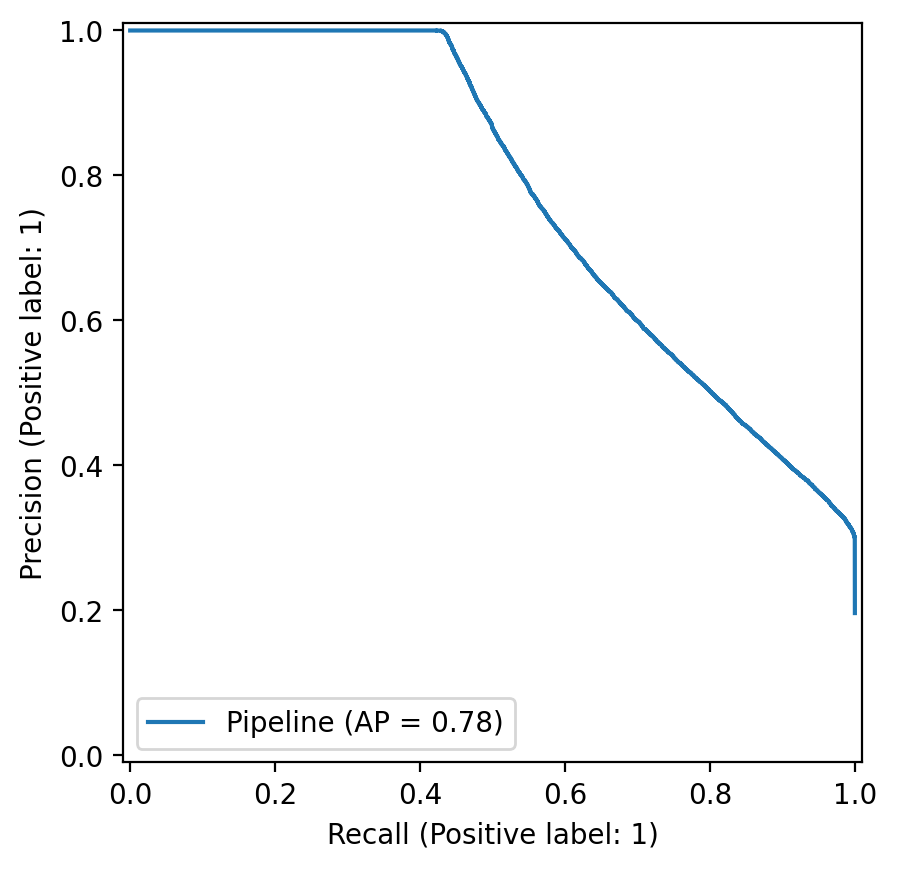

In [33]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(LR_best_model, x_test, target_pipeline.transform(y_test))

One important thing which should be done is choosing the threshold for classifying to class 1 or 0.
The classification report above was given by assuming the default threshold of 0.5.
Now let's find out the correct threshold.


#### Threshold Adjustment for Logistic Regression

In [34]:
from sklearn.model_selection import TunedThresholdClassifierCV

def find_best_threshold(model,x_train,x_test,y_train,y_test,scoring='f1'):
    model = TunedThresholdClassifierCV(estimator=model,scoring=scoring,cv=3,n_jobs=-1,store_cv_results=True)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(f'Best threshold is {round(model.best_threshold_,2)} with {scoring} score {round(model.best_score_,2)}')
    
    # Plotting a graph to locate the threshold with the highest score
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(
        model.cv_results_["thresholds"],
        model.cv_results_["scores"],
        marker="o",
        linewidth=1e-3,
        markersize=4,
        color="#c0c0c0",
    )
    ax.plot(
        model.best_threshold_,
        model.best_score_,
        "^",
        markersize=10,
        color="#ff6700",
        label=f"Optimal cut-off point = {model.best_threshold_:.2f}",
    )
    ax.legend(fontsize=8, loc="lower center")
    ax.set_xlabel("Decision threshold", fontsize=10)
    ax.set_ylabel("F1 score", fontsize=10)
    ax.set_title("F1 score vs. Decision threshold -- Cross-validation", fontsize=12)
    return model

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     95507
           1       0.69      0.62      0.65     23302

    accuracy                           0.87    118809
   macro avg       0.80      0.77      0.79    118809
weighted avg       0.87      0.87      0.87    118809

Best threshold is 0.65 with f1 score 0.65


TunedThresholdClassifierCV(cv=3,
                           estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                      Pipeline(steps=[('feature_engineering_pipeline',
                                                                       FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                                       Pipeline(steps=[('all_numerical_features',
                                                                                                                        FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                        Pipeline(steps=[('select_skewed_feature...
                                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                                       ('cat_nominal_ohe',
                                                                                                                        OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                                                      min_frequency=0.01,
                                                                                                                                      sparse_output=False))]))])),
                                                                      ('feature_selection_pipeline',
                                                                       SelectKBest(k=30,
                                                                                   score_func=<function chi2 at 0x0000022F8DE7B6A0>))])),
                                                     ('logreg',
                                                      LogisticRegression(C=0.01,
                                                                         class_weight='balanced',
                                                                         max_iter=1000))]),
                           n_jobs=-1, scoring='f1', store_cv_results=True)

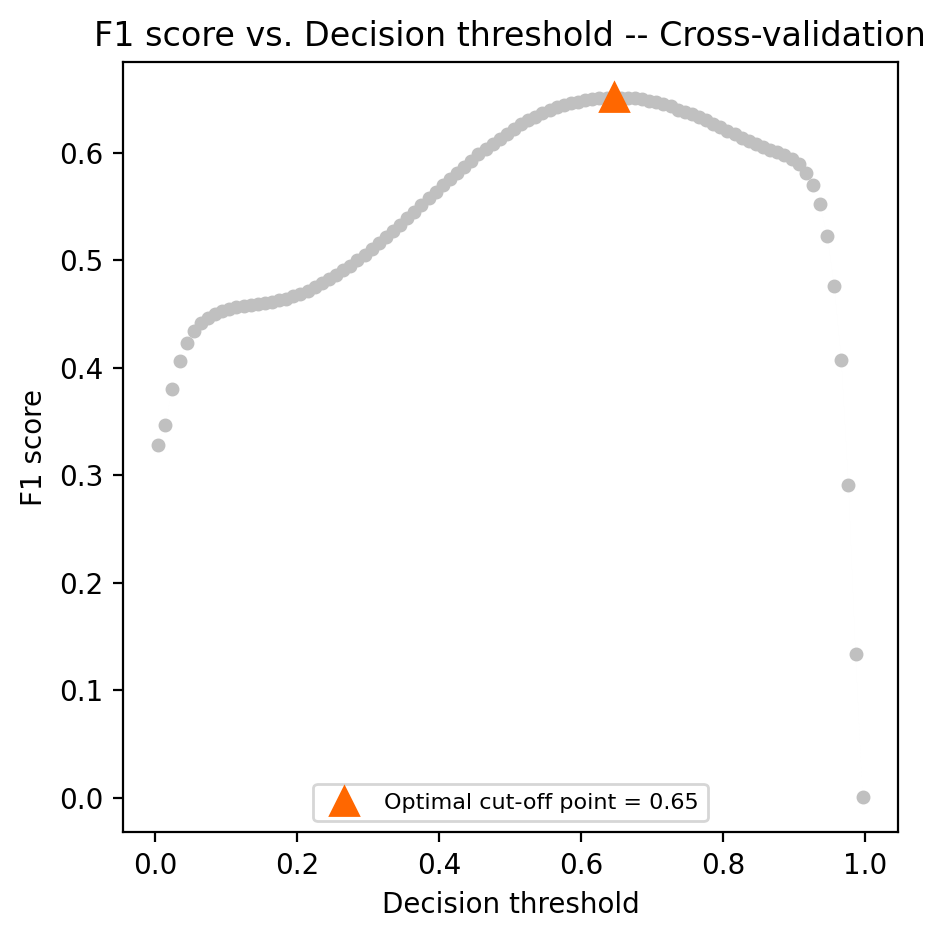

In [35]:
find_best_threshold(LR_best_model,x_train_NO,x_test,y_train_transformed_no,y_test_transformed,scoring='f1')

#### Feature importance of Logistic Regression

In [50]:
features = selected_FE_with_FS.transform(x_test).columns

Fi_df = pd.DataFrame({'feature':features,'importances':LR_best_model['logreg'].coef_[0]})

Fi_df = Fi_df.sort_values(by='importances',ascending=False,key=abs)
Fi_df.head()

,feature,importances
26,zipcode_29597,-3.649614
28,zipcode_93700,3.649181
24,zipcode_05113,-3.642794
23,zipcode_00813,-3.641401
25,zipcode_11650,3.638120


#### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

pipe2_RF = Pipeline(steps=[
    ('feature_engineering_pipeline',selected_FE_with_FS),
    ('rfc',RandomForestClassifier())
])
params = {
    'rfc__n_estimators':[100,120,150],
    'rfc__max_depth':[5,7,8],
    'rfc__class_weight':['balanced'],
    'rfc__max_samples':[0.4,0.6,0.8]
}
grid2 = GridSearchCV(estimator=pipe2_RF,param_grid=params,
                     cv=2, scoring='f1',n_jobs=-1,verbose=1)

grid2.fit(x_train,target_pipeline.transform(y_train))


Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical_features',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_skewed_features',
                                                                                                                                                           FunctionTra...
                                                                                                                        min_frequency=0.01,
                                                                                                                        sparse_output=False))]))])),
                                                        ('feature_selection_pipeline',
                                                         SelectKBest(k=30,
                                                                     score_func=<function chi2 at 0x0000022F8DE7B6A0>))])),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__class_weight': ['balanced'],
                         'rfc__max_depth': [5, 7, 8],
                         'rfc__max_samples': [0.4, 0.6, 0.8],
                         'rfc__n_estimators': [100, 120, 150]},
             scoring='f1', verbose=1)

In [37]:
grid2.best_params_
RF_best_model = grid2.best_estimator_

{'rfc__class_weight': 'balanced',
 'rfc__max_depth': 8,
 'rfc__max_samples': 0.4,
 'rfc__n_estimators': 150}

In [38]:
y_pred2 = grid2.predict(x_test)
print(classification_report(y_test_transformed,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     95507
           1       0.45      0.84      0.59     23302

    accuracy                           0.77    118809
   macro avg       0.70      0.80      0.71    118809
weighted avg       0.85      0.77      0.79    118809



We have got decent recall score of 0.84 for the target class with threshold as 0.5.

In [39]:
y_train_transformed = target_pipeline.transform(y_train)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     95507
           1       0.67      0.63      0.65     23302

    accuracy                           0.87    118809
   macro avg       0.79      0.78      0.78    118809
weighted avg       0.86      0.87      0.86    118809

Best threshold is 0.63 with f1 score 0.65


TunedThresholdClassifierCV(cv=3,
                           estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                      Pipeline(steps=[('feature_engineering_pipeline',
                                                                       FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                                       Pipeline(steps=[('all_numerical_features',
                                                                                                                        FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                        Pipeline(steps=[('select_skewed_feature...
                                                                                                                       ('cat_nominal_ohe',
                                                                                                                        OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                                                      min_frequency=0.01,
                                                                                                                                      sparse_output=False))]))])),
                                                                      ('feature_selection_pipeline',
                                                                       SelectKBest(k=30,
                                                                                   score_func=<function chi2 at 0x0000022F8DE7B6A0>))])),
                                                     ('rfc',
                                                      RandomForestClassifier(class_weight='balanced',
                                                                             max_depth=8,
                                                                             max_samples=0.4,
                                                                             n_estimators=150))]),
                           n_jobs=-1, scoring='f1', store_cv_results=True)

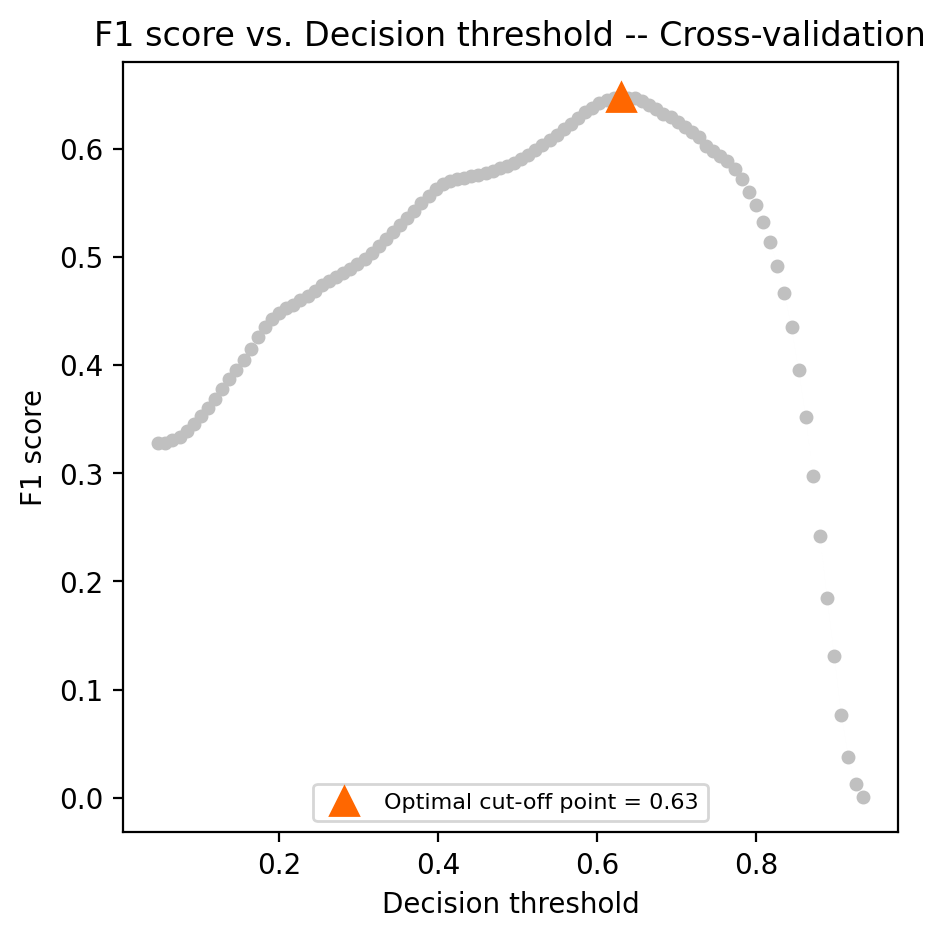

In [40]:
find_best_threshold(RF_best_model,x_train,x_test,y_train_transformed,y_test_transformed,scoring='f1')

#### Feature importance for Random Forest

In [49]:
features = selected_FE_with_FS.transform(x_test).columns

In [52]:
importances = RF_best_model['rfc'].feature_importances_

In [54]:
Fi_df_RF = pd.DataFrame({'feature':features,'importance':importances})

In [56]:
Fi_df_RF = Fi_df_RF.sort_values(by='importance',ascending=False)

#### XGBoost

In [60]:
from xgboost import XGBClassifier

pipe3_xgb = Pipeline(steps=[
    ('feature_engineering_pipeline',selected_FE_with_FS),
    ('xgb',XGBClassifier())
])
params = {
    'xgb__n_estimators':[100,150,250],
    'xgb__max_depth':[3,4,5],
    'xgb__learning_rate':[0.1,0.2,0.3],
    'xgb__min_samples_leaf':[12,24,32]
}

grid3 = GridSearchCV(pipe3_xgb,param_grid=params,
                     scoring='f1',
                     cv=2,
                     n_jobs=-1,
                     verbose=1)
grid3.fit(x_train_NO,target_pipeline.transform(y_train_NO))

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical_features',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_skewed_features',
                                                                                                                                                           FunctionTra...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1, 0.2, 0.3],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__min_samples_leaf': [12, 24, 32],
                         'xgb__n_estimators': [100, 150, 250]},
             scoring='f1', verbose=1)

In [63]:
grid3.best_params_
grid3.best_score_
XGB_best_model = grid3.best_estimator_

{'xgb__learning_rate': 0.2,
 'xgb__max_depth': 5,
 'xgb__min_samples_leaf': 12,
 'xgb__n_estimators': 250}

np.float64(0.625540483376452)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     95507
           1       0.68      0.62      0.65     23302

    accuracy                           0.87    118809
   macro avg       0.79      0.78      0.78    118809
weighted avg       0.86      0.87      0.87    118809

Best threshold is 0.3199999928474426 with f1 score 0.65


TunedThresholdClassifierCV(cv=3,
                           estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                      Pipeline(steps=[('feature_engineering_pipeline',
                                                                       FeatureUnion(transformer_list=[('numerical_features_combined_pipeline',
                                                                                                       Pipeline(steps=[('all_numerical_features',
                                                                                                                        FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                        Pipeline(steps=[('select_skewed_feature...
                                                                    interaction_constraints=None,
                                                                    learning_rate=0.2,
                                                                    max_bin=None,
                                                                    max_cat_threshold=None,
                                                                    max_cat_to_onehot=None,
                                                                    max_delta_step=None,
                                                                    max_depth=5,
                                                                    max_leaves=None,
                                                                    min_child_weight=None,
                                                                    min_samples_leaf=12,
                                                                    missing=nan,
                                                                    monotone_constraints=None,
                                                                    multi_strategy=None,
                                                                    n_estimators=250,
                                                                    n_jobs=None,
                                                                    num_parallel_tree=None, ...))]),
                           n_jobs=-1, scoring='f1', store_cv_results=True)

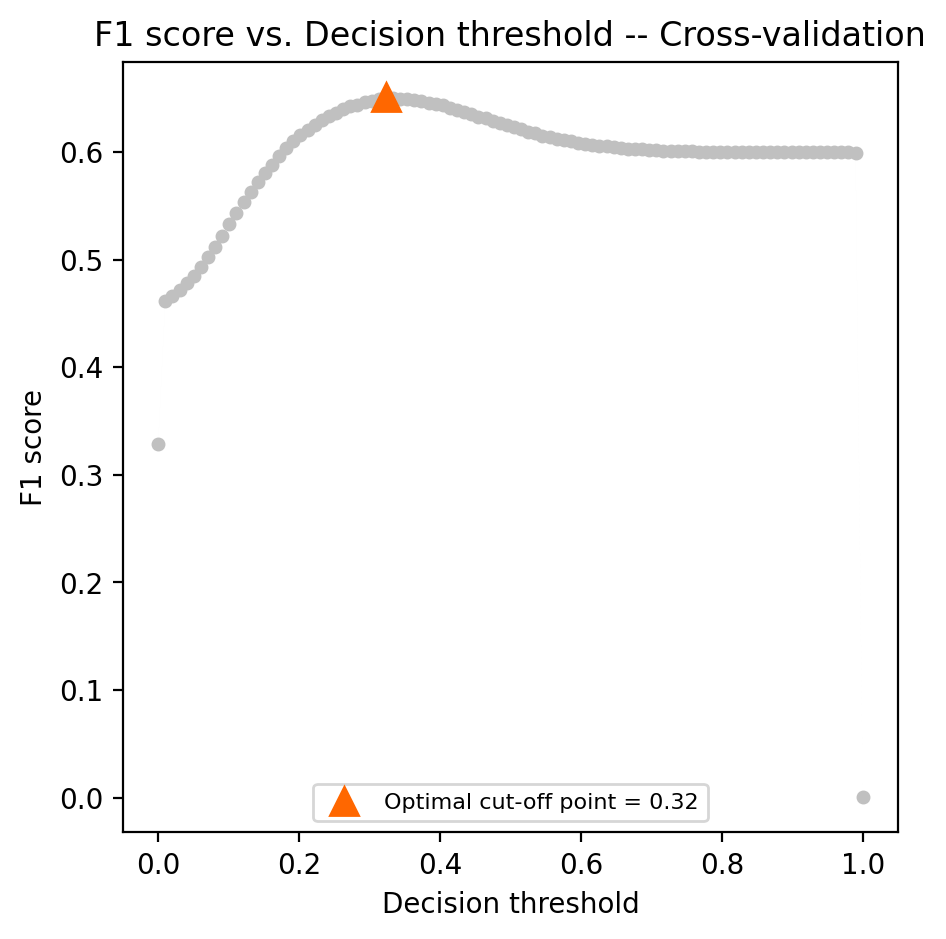

In [65]:
find_best_threshold(XGB_best_model,x_train_NO,x_test,y_train_transformed_no,y_test_transformed,scoring='f1')

#### Feature importance of XGBoost